In [33]:
file = open("vectors.txt","r")
data = file.readlines()
Nlines = len(data)
print("Nlines = ",Nlines)

Nlines =  278


In [34]:
wfile = open("words_idx.txt","r")
words = wfile.readlines()
Nwords = len(words)
print("Nwords = ",Nwords)

Nwords =  18446


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
Ndocs = int(Nlines/2)
A = np.zeros((Nwords,Ndocs))
Doc_idx = np.zeros((Ndocs,))
label = np.zeros((Ndocs,))
for j in range(Ndocs):
    Doc_idx = data[2*j]
    line = data[2*j+1]
    line = line.split()
    numbers = [eval(i) for i in line]
    label = numbers[0]
    w_idx = np.array(numbers[1::2])-1 # make indices start from 0
    w_count = numbers[2::2]
    A[w_idx,j] = 1       
# np.savetxt("Amatrix.csv", A, delimiter=",")

In [135]:
# given A=WH, extract common words from W corresponding to entries above threshold
def common_words(W,threshold):
    plt.rcParams.update({'font.size': 20})
    fig, ax = plt.subplots(figsize = (8,8))
    for j in range(k):
        ind = np.squeeze(np.argwhere(W[:,j] > threshold))
        Wargsort = W[ind,j].argsort()[::-1]
        print(W[ind,j][Wargsort])
        plt.plot(np.sort(W[:,j]))
        if len(Wargsort) > 0:
            for i in Wargsort:
                print(ind[i]+1,words[ind[i]])

trial = 0
trial = 1
trial = 2
trial = 3
trial = 4
trial = 5


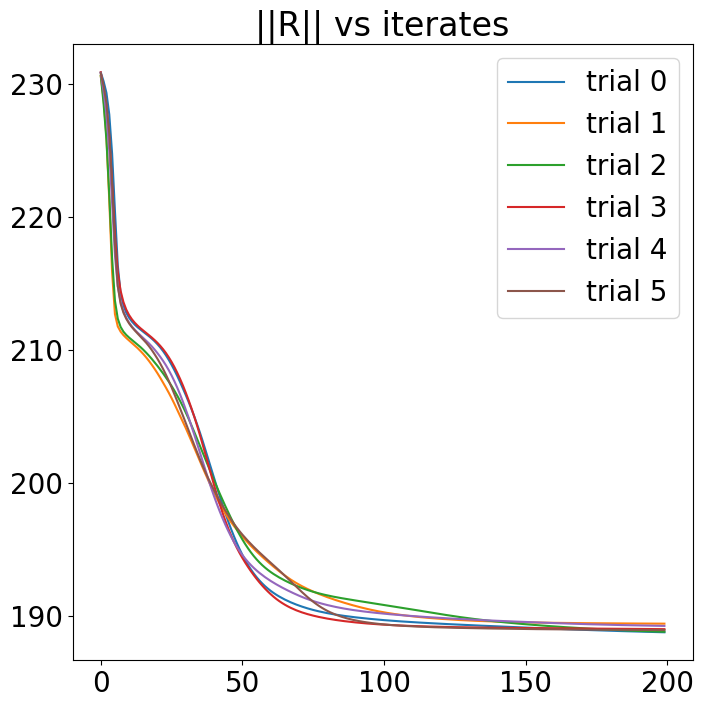

In [87]:
# PGD
k = 10
iter_max = 200
alpha = 5e-3 #stepsize

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize = (8,8))
plt.title('||R|| vs iterates')

for trial in range(6):
    print('trial = {}'.format(trial))
    W = np.random.rand(Nwords,k)
    H = np.random.rand(k,Ndocs)
    R_FroNorm = np.zeros(iter_max)
    R = A - W@H
    for iter in range(iter_max):
        Wnew = np.maximum(0,W+alpha*R@H.T)
        W = Wnew
        Hnew = np.maximum(0,H+alpha*W.T@R)
        H = Hnew
        R = A - W@H
        R_FroNorm[iter] = np.linalg.norm(R,'fro')
    plt.plot(R_FroNorm, label='trial {}'.format(trial))

plt.legend(loc='upper right')
plt.savefig('hw6 pgd')
plt.show()

[0.26038062 0.25987397 0.25689575 0.24946424 0.24801556 0.24698036
 0.24569863 0.24557925 0.24477225 0.24343102 0.24162173 0.24154908
 0.24006786 0.23968665 0.23923565 0.2389035  0.23858838 0.2375374
 0.23721996 0.23696248 0.23667608 0.23588905 0.23553339 0.23534063
 0.23481217 0.234682   0.23395069 0.23307201 0.23268202 0.23235399
 0.23162897 0.23087102 0.23058069 0.23058017 0.22989535 0.22924458
 0.2286953  0.22807351 0.22786461 0.22784301 0.22778697 0.22754906
 0.22752135 0.22749787 0.22745499 0.2268326  0.22680345 0.22660244
 0.22647761 0.22600256 0.22552255 0.22538817 0.22534938 0.22515188
 0.22448454 0.22436686 0.22396442 0.22377439 0.22375321 0.22369366
 0.22311881 0.22299363 0.22284102 0.22262538 0.22238997 0.22232
 0.22224251 0.22205611 0.22198241 0.22171919 0.22169769 0.22160164
 0.22148502 0.22137763 0.22117475 0.22089573 0.22085735 0.2206882
 0.22065019 0.22048187 0.22035816 0.22000055 0.21993516 0.21976477
 0.2196938  0.2190598  0.2190021  0.21897528 0.21895227 0.21882237


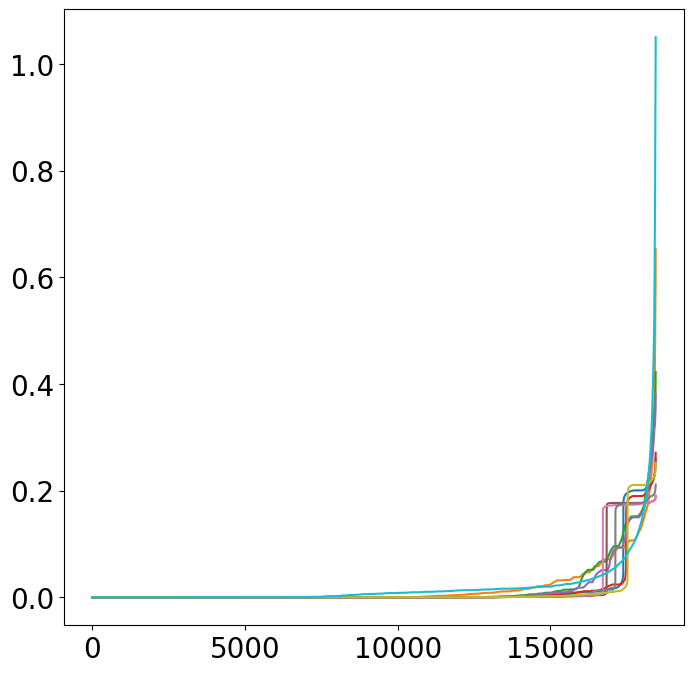

In [140]:
# PGD analysis
common_words(W,threshold=0.2)

In [108]:
a = np.array([2, 3, 1])
b = np.array([10, 100, 1000])
p = a.argsort()[::-1]
print(p)
print(a[p],b[p])
for i in range(len)

[1 0 2]
[3 2 1] [ 100   10 1000]
